In [1]:
#-------------------------------------------------------------------------------
    #
    #  Filename       : anaScaler.ipynb
    #  Author         : Huang Leilei
    #  Status         : draft
    #  Created        : 2025-02-18
    #  Description    : analyze scaling
    #
#-------------------------------------------------------------------------------

In [2]:
# import
import cv2
import numpy as np
import matplotlib.pyplot as plt

# parameter
CSTR_FILE_INP       = "/mnt/e/DOWNLOAD/SEQUENCE/HM/Cactus/Cactus.yuv"
CSTR_FILE_OUT       = "scaled.yuv"
FLAG_QUANT          = 1
DATA_QUANT          = 256
SIZE_FRAME_X        = 1920
SIZE_FRAME_Y        = 1080
SIZE_FRAME_SCALED_X = 1920 // 4 * 3
SIZE_FRAME_SCALED_Y = 1080 // 4 * 3
SIZE_FRAME_SCALED_Y = SIZE_FRAME_SCALED_Y // 4 * 4

# read
fpt = open(CSTR_FILE_INP, "rb")
datY = np.zeros(shape=(SIZE_FRAME_Y   ,SIZE_FRAME_X   ), dtype="uint8", order="C")
for idxY in range(SIZE_FRAME_Y     ):
    for idxX in range(SIZE_FRAME_X     ):
        datY[idxY][idxX] = ord(fpt.read(1))
datU = np.zeros(shape=(SIZE_FRAME_Y//2,SIZE_FRAME_X//2), dtype="uint8", order="C")
for idxY in range(SIZE_FRAME_Y // 2):
    for idxX in range(SIZE_FRAME_X // 2):
        datU[idxY][idxX] = ord(fpt.read(1))
datV = np.zeros(shape=(SIZE_FRAME_Y//2,SIZE_FRAME_X//2), dtype="uint8", order="C")
for idxY in range(SIZE_FRAME_Y // 2):
    for idxX in range(SIZE_FRAME_X // 2):
        datV[idxY][idxX] = ord(fpt.read(1))
fpt.close()

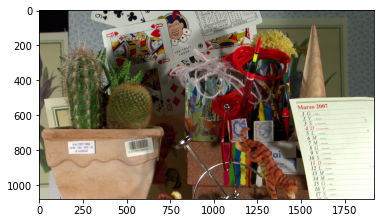

In [3]:
# show
datYReshaped = datY
datUReshaped = datU.reshape((SIZE_FRAME_Y//4, SIZE_FRAME_X)).astype("uint8")
datVReshaped = datV.reshape((SIZE_FRAME_Y//4, SIZE_FRAME_X)).astype("uint8")
datYuvReshaped = np.concatenate((datYReshaped,datUReshaped,datVReshaped), axis=0)
datRgb = cv2.cvtColor(datYuvReshaped, cv2.COLOR_YUV2RGB_I420)
plt.imshow(datRgb)

In [4]:
# write
fpt = open(CSTR_FILE_OUT, "wb")
for idxY in range(SIZE_FRAME_Y     ):
    for idxX in range(SIZE_FRAME_X     ):
        fpt.write(datY[idxY][idxX])
for idxY in range(SIZE_FRAME_Y // 2):
    for idxX in range(SIZE_FRAME_X // 2):
        fpt.write(datU[idxY][idxX])
for idxY in range(SIZE_FRAME_Y // 2):
    for idxX in range(SIZE_FRAME_X // 2):
        fpt.write(datV[idxY][idxX])
fpt.close()

In [5]:
# process
datScaleX = 1 / SIZE_FRAME_SCALED_X * SIZE_FRAME_X
datScaleY = 1 / SIZE_FRAME_SCALED_Y * SIZE_FRAME_Y
if (FLAG_QUANT):
    datScaleX = np.floor(datScaleX * 256) // 256
    datScaleY = np.floor(datScaleY * 256) // 256
datYScaled = np.zeros(shape=(SIZE_FRAME_SCALED_Y   ,SIZE_FRAME_SCALED_X   ), dtype="uint8", order="C")
for idxY in range(SIZE_FRAME_SCALED_Y     ):
    for idxX in range(SIZE_FRAME_SCALED_X     ):
        idxXSrc = idxX * datScaleX
        idxXSrcInt = int(np.floor(idxXSrc))
        idxXSrcFrc = idxXSrc - idxXSrcInt
        idxYSrc = idxY * datScaleY
        idxYSrcInt = int(np.floor(idxYSrc))
        idxYSrcFrc = idxYSrc - idxYSrcInt
        if (FLAG_QUANT):
            idxXSrcFrc = np.floor(idxXSrcFrc * 256) // 256
            idxYSrcFrc = np.floor(idxYSrcFrc * 256) // 256
        datOri00 = float(datY[idxYSrcInt + 0][idxXSrcInt + 0])
        datOri01 = float(datY[idxYSrcInt + 0][idxXSrcInt + 1])
        datOri10 = float(datY[idxYSrcInt + 1][idxXSrcInt + 0])
        datOri11 = float(datY[idxYSrcInt + 1][idxXSrcInt + 1])
        datItp0x = datOri00 * (1 - idxXSrcFrc) + datOri01 * idxXSrcFrc
        datItp1x = datOri10 * (1 - idxXSrcFrc) + datOri11 * idxXSrcFrc
        datItpxx = datItp0x * (1 - idxYSrcFrc) + datItp1x * idxYSrcFrc
        datYScaled[idxY][idxX] = int(datItpxx)
datUScaled = np.zeros(shape=(SIZE_FRAME_SCALED_Y//2,SIZE_FRAME_SCALED_X//2), dtype="uint8", order="C")
for idxY in range(SIZE_FRAME_SCALED_Y // 2):
    for idxX in range(SIZE_FRAME_SCALED_X // 2):
        idxXSrc = idxX * datScaleX
        idxXSrcInt = int(np.floor(idxXSrc))
        idxXSrcFrc = idxXSrc - idxXSrcInt
        idxYSrc = idxY * datScaleY
        idxYSrcInt = int(np.floor(idxYSrc))
        idxYSrcFrc = idxYSrc - idxYSrcInt
        if (FLAG_QUANT):
            idxXSrcFrc = np.floor(idxXSrcFrc * 256) // 256
            idxYSrcFrc = np.floor(idxYSrcFrc * 256) // 256
        datOri00 = float(datU[idxYSrcInt + 0][idxXSrcInt + 0])
        datOri01 = float(datU[idxYSrcInt + 0][idxXSrcInt + 1])
        datOri10 = float(datU[idxYSrcInt + 1][idxXSrcInt + 0])
        datOri11 = float(datU[idxYSrcInt + 1][idxXSrcInt + 1])
        datItp0x = datOri00 * (1 - idxXSrcFrc) + datOri01 * idxXSrcFrc
        datItp1x = datOri10 * (1 - idxXSrcFrc) + datOri11 * idxXSrcFrc
        datItpxx = datItp0x * (1 - idxYSrcFrc) + datItp1x * idxYSrcFrc
        datUScaled[idxY][idxX] = int(datItpxx)
datVScaled = np.zeros(shape=(SIZE_FRAME_SCALED_Y//2,SIZE_FRAME_SCALED_X//2), dtype="uint8", order="C")
for idxY in range(SIZE_FRAME_SCALED_Y // 2):
    for idxX in range(SIZE_FRAME_SCALED_X // 2):
        idxXSrc = idxX * datScaleX
        idxXSrcInt = int(np.floor(idxXSrc))
        idxXsrcFrc = idxXSrc - idxXSrcInt
        idxYSrc = idxY * datScaleY
        idxYSrcInt = int(np.floor(idxYSrc))
        idxYSrcFrc = idxYSrc - idxYSrcInt
        if (FLAG_QUANT):
            idxXSrcFrc = np.floor(idxXSrcFrc * 256) // 256
            idxYSrcFrc = np.floor(idxYSrcFrc * 256) // 256
        datOri00 = float(datV[idxYSrcInt + 0][idxXSrcInt + 0])
        datOri01 = float(datV[idxYSrcInt + 0][idxXSrcInt + 1])
        datOri10 = float(datV[idxYSrcInt + 1][idxXSrcInt + 0])
        datOri11 = float(datV[idxYSrcInt + 1][idxXSrcInt + 1])
        datItp0x = datOri00 * (1 - idxXSrcFrc) + datOri01 * idxXSrcFrc
        datItp1x = datOri10 * (1 - idxXSrcFrc) + datOri11 * idxXSrcFrc
        datItpxx = datItp0x * (1 - idxYSrcFrc) + datItp1x * idxYSrcFrc
        datVScaled[idxY][idxX] = int(datItpxx)

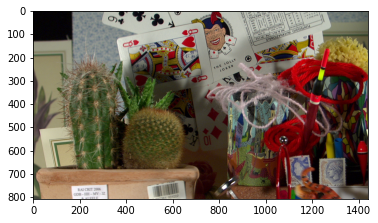

In [6]:
# show
datYReshaped = datYScaled
datUReshaped = datUScaled.reshape((SIZE_FRAME_SCALED_Y//4, SIZE_FRAME_SCALED_X)).astype("uint8")
datVReshaped = datVScaled.reshape((SIZE_FRAME_SCALED_Y//4, SIZE_FRAME_SCALED_X)).astype("uint8")
datYuvReshaped = np.concatenate((datYReshaped,datUReshaped,datVReshaped), axis=0)
datRgb = cv2.cvtColor(datYuvReshaped, cv2.COLOR_YUV2RGB_I420)
plt.imshow(datRgb)

In [7]:
# write
fpt = open(CSTR_FILE_OUT, "wb")
for idxY in range(SIZE_FRAME_SCALED_Y     ):
    for idxX in range(SIZE_FRAME_SCALED_X     ):
        fpt.write(datYScaled[idxY][idxX])
for idxY in range(SIZE_FRAME_SCALED_Y // 2):
    for idxX in range(SIZE_FRAME_SCALED_X // 2):
        fpt.write(datUScaled[idxY][idxX])
for idxY in range(SIZE_FRAME_SCALED_Y // 2):
    for idxX in range(SIZE_FRAME_SCALED_X // 2):
        fpt.write(datVScaled[idxY][idxX])
fpt.close()

In [8]:
# parameter
SIZE_LCU = 16
NUMB_AXS = 2
NUMB_CLK = 800

# common
numMulForBaseAddress = 1 * NUMB_AXS
numMulForPixelAddress = 16 * NUMB_AXS

# 2x2
numMulForScaling2x2 = SIZE_LCU * SIZE_LCU * 2 * 3

# 4x4
numMulForScaling4x4 = SIZE_LCU * SIZE_LCU * 4 * 5

# log
print("before average:")
print("numMulForBaseAddress : {:d}".format(numMulForBaseAddress ))
print("numMulForPixelAddress: {:d}".format(numMulForPixelAddress))
print("numMulForScaling2x2  : {:d}".format(numMulForScaling2x2  ))
print("numMulForScaling4x4  : {:d}".format(numMulForScaling4x4  ))
print("after average:")
print("numMulForScaling2x2  : {:d}".format((numMulForScaling2x2 + NUMB_CLK - 1) // NUMB_CLK))
print("numMulForScaling4x4  : {:d}".format((numMulForScaling4x4 + NUMB_CLK - 1) // NUMB_CLK))

before average:
numMulForBaseAddress : 2
numMulForPixelAddress: 32
numMulForScaling2x2  : 1536
numMulForScaling4x4  : 5120
after average:
numMulForScaling2x2  : 2
numMulForScaling4x4  : 7
